# PSet 2: Wasil Engel 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [2]:
# ch 4, no. 11

In [3]:
# predict whether a given car gets high or low gas mileage

In [4]:
path_1 = '/Users/wasilengel/Desktop/School/Harris/Machine Learning/Auto-and-Default/Data-Auto.csv'

In [5]:
df = pd.read_csv(path_1)

In [6]:
df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
# a 

In [8]:
df["mpg"].median() # median is at 22.75

22.75

In [9]:
#if df["mpg"] > 22.75:
#    df["mpg01"] == 1
#else:
#    df["mpg01"] == 0

In [10]:
df['mpg01'] = pd.Series(np.zeros(df.shape[0]))
df.loc[df['mpg']>22.75, 'mpg01'] = 1
df.loc[df['mpg']<=22.75, 'mpg01'] = 0
df.tail(10)

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
382,388,26.0,4,156.0,92,2585,14.5,82,1,chrysler lebaron medallion,1.0
383,389,22.0,6,232.0,112,2835,14.7,82,1,ford granada l,0.0
384,390,32.0,4,144.0,96,2665,13.9,82,3,toyota celica gt,1.0
385,391,36.0,4,135.0,84,2370,13.0,82,1,dodge charger 2.2,1.0
386,392,27.0,4,151.0,90,2950,17.3,82,1,chevrolet camaro,1.0
387,393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1.0
388,394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1.0
389,395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1.0
390,396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1.0
391,397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10,1.0


In [11]:
# Test
df['mpg01'].unique()
# It worked!

array([0., 1.])

In [12]:
# b 

In [13]:
# df
# Note: 11 columns in total 

In [14]:
df.columns

Index(['Unnamed: 0', 'mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration', 'year', 'origin', 'name', 'mpg01'],
      dtype='object')

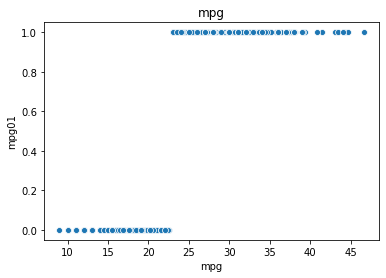

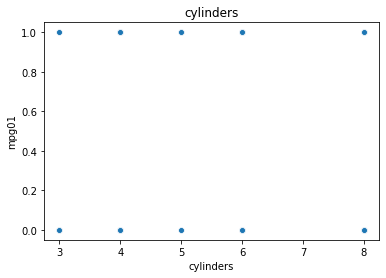

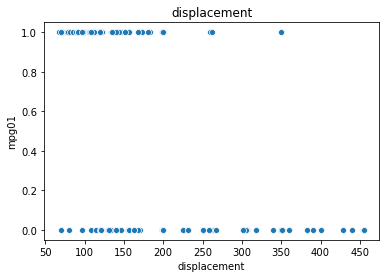

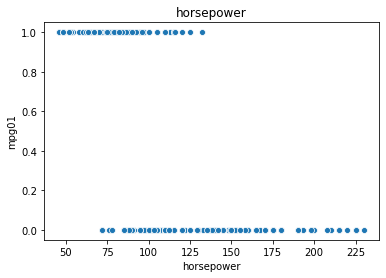

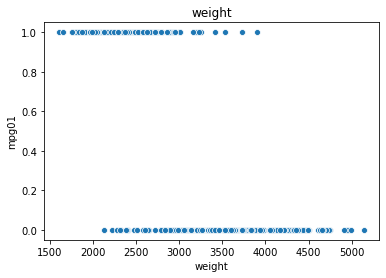

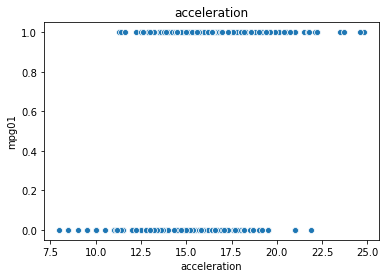

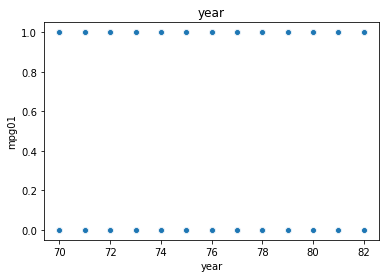

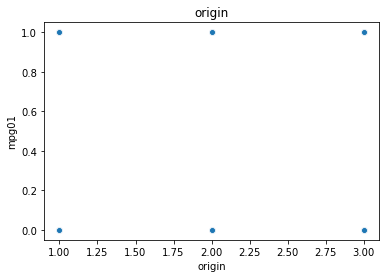

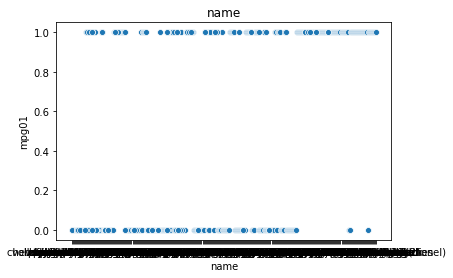

In [15]:
for col in df.iloc[:,1:10].columns: 
    sns.scatterplot(df[col],df['mpg01'])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('mpg01')
    plt.show()

In [16]:
# Among the other variables in the dataset, most useful in predicting mpg01 are (in descending order):
# - horsepower: fairly good predictor where horsepower values above approx. 75 are associated with mpg01 = 0.0 and horsepower values below approx. 140 with mpg01 = 1.0
# - weight: similarly good predictor like the pattern in horsepower where weight values above approx. 2100 are associated with mpg01 = 0.0 and weight values below approx. 4000 with mpg01 = 1.0
# - acceleration: again, similarly good predictor in that acceleration values below approx. 20.0 (with a couple exceptions) are associated with mpg01 = 0.0 and acceleration values above approx. 11 with mpg01 = 1.0
# - displacement: only very few displacement values above approx. 200 seem to be associated with mpg01 = 1.0
# The following variables are not useful since they do not show any pattern: 
# - cylinders 
# - year
# - origin
# - name
# mpg: obviously, there's a clear correlation because that's the base variable for mpg01 where I can see the cut-off point is at 22.75 where everthing less is being coded as zero, and everything more as one -- because of perfect multicollinearity, however, not useful!

# Overall, these findings make sense as mileage is associated with horsepower, weight, acceleration capacities, and overall displacement rather than cylinders, or the car name/ origin. 

In [17]:
# c

In [18]:
X = df.drop(['mpg01', 'mpg', 'cylinders', 'year', 'origin', 'name'], axis=1)
# dropping the ones I found were least associated with mpg01
Y = df['mpg01']

In [19]:
print(X.shape)
print(Y.shape)

(392, 5)
(392,)


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=123)

In [21]:
# Y_train = Y_train.values.reshape(-1, 1)

In [22]:
# d 

In [23]:
# Note that I already dropped the non- or least-associated variables with mpg01 in c

In [24]:
X_train.columns

Index(['Unnamed: 0', 'displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')

In [25]:
print(X_train.shape)
print(Y_train.shape) 
# note how training data has been reduced down to 80 per cent: from 392 to 313

(313, 5)
(313,)


In [26]:
# Choose method  
lda_model = LinearDiscriminantAnalysis()

In [27]:
# Train model: fit X on Y 
lda_model.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [28]:
# Now, predict Y from test data
Y_pred = lda_model.predict(X_test)
Y_pred

array([0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.])

In [29]:
# Calculate test error: that is, how much does Y_pred correctly identify Y_test? 
score = accuracy_score(Y_test, Y_pred) # 0.8354430379746836
(1 - score) * 100
# That is equivalent to a test error of approx. 16.46 per cent.

16.455696202531644

In [30]:
# e

In [31]:
qda_model = QuadraticDiscriminantAnalysis()

In [32]:
qda_model.fit(X_train, Y_train)

QuadraticDiscriminantAnalysis()

In [33]:
Y_pred = qda_model.predict(X_test)
Y_pred

array([0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.])

In [34]:
score = accuracy_score(Y_test, Y_pred) # 0.8607594936708861
(1 - score) * 100
# The test error is at approx. 13.92 per cent too. 

13.924050632911388

In [35]:
# f 

In [36]:
logit_model = LogisticRegression()

In [37]:
logit_model.fit(X_train, Y_train)

/Users/wasilengel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
Y_pred = logit_model.predict(X_test)
Y_pred

array([0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.])

In [39]:
score = accuracy_score(Y_test, Y_pred) # 0.8734177215189873
(1 - score) * 100
# Using logistic regression, the test error rate is at approx. 12.66 per cent. 

12.658227848101266

In [40]:
# ch. 5, no. 5

In [41]:
path_2 = '/Users/wasilengel/Desktop/School/Harris/Machine Learning/Auto-and-Default/Data-Default.csv'

In [42]:
df = pd.read_csv(path_2)

In [43]:
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [44]:
X = df.drop(['default', 'student'], axis=1)
X

,Unnamed: 0,balance,income
0,1,729.526495,44361.625074
1,2,817.180407,12106.134700
2,3,1073.549164,31767.138947
3,4,529.250605,35704.493935
4,5,785.655883,38463.495879
...,...,...,...
9995,9996,711.555020,52992.378914
9996,9997,757.962918,19660.721768
9997,9998,845.411989,58636.156984
9998,9999,1569.009053,36669.112365


In [45]:
Y = df['default']
Y.head(10)

0    No
1    No
2    No
3    No
4    No
5    No
6    No
7    No
8    No
9    No
Name: default, dtype: object

In [46]:
d = {'Yes': True, 'No': False}

In [47]:
Y = Y.map(d)
Y.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: default, dtype: bool

In [48]:
# a

In [49]:
logit_all_model = LogisticRegression()

In [50]:
logit_all_model.fit(X, Y)

LogisticRegression()

In [52]:
Y_pred = logit_all_model.predict(X)

In [53]:
score = accuracy_score(Y, Y_pred) # 0.9735

In [54]:
(1 - score) * 100
# Using logistic regression, the test error rate is at approx. 2.65 per cent.

2.6800000000000046

In [55]:
# b (i)

In [56]:
print(X.shape)
print(Y.shape)

(10000, 3)
(10000,)


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=123)

In [58]:
print(X_train.shape)
print(Y_train.shape) 

(8000, 3)
(8000,)


In [59]:
# b (ii)

In [60]:
logit_model = LogisticRegression()

In [61]:
logit_model.fit(X_train, Y_train)

LogisticRegression()

In [62]:
# b (iii)

In [63]:
y_posterior = logit_model.predict_proba(X_test)
y_posterior[:10]

array([[9.99401232e-01, 5.98768142e-04],
       [9.99973393e-01, 2.66071449e-05],
       [9.95632676e-01, 4.36732389e-03],
       [9.99971908e-01, 2.80920982e-05],
       [9.98780429e-01, 1.21957061e-03],
       [8.85394865e-01, 1.14605135e-01],
       [8.56428428e-01, 1.43571572e-01],
       [9.98327484e-01, 1.67251643e-03],
       [9.99893436e-01, 1.06564348e-04],
       [9.99679763e-01, 3.20236556e-04]])

In [64]:
# Convert to df
df_posterior = pd.DataFrame(y_posterior) 
df_posterior.head(10)

,0,1
0,0.999401,0.000599
1,0.999973,0.000027
2,0.995633,0.004367
3,0.999972,0.000028
4,0.998780,0.001220
5,0.885395,0.114605
6,0.856428,0.143572
7,0.998327,0.001673
8,0.999893,0.000107
9,0.999680,0.000320


In [65]:
# # Given that the columns represent the probability for label 0 and 1 respectively, I only care about the second column
df_posterior["defaults"] = df_posterior[1]>0.5
df_posterior.head(10)

,0,1,defaults
0,0.999401,0.000599,False
1,0.999973,0.000027,False
2,0.995633,0.004367,False
3,0.999972,0.000028,False
4,0.998780,0.001220,False
5,0.885395,0.114605,False
6,0.856428,0.143572,False
7,0.998327,0.001673,False
8,0.999893,0.000107,False
9,0.999680,0.000320,False


In [66]:
# Make sure that there are some true values in there too:
df_posterior["defaults"].unique()

array([False,  True])

In [67]:
# The predicted default status is given by the new columns "defaults" in df_posterior and this vector here:
Y_pred = df_posterior["defaults"]
Y_pred.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: defaults, dtype: bool

In [68]:
# b (iv)

In [69]:
score = accuracy_score(Y_test, Y_pred) # 0.974
(1 - score) * 100
# The validation set error is at approx. 2.6 per cent. 

2.6000000000000023

In [70]:
# c 

In [71]:
## Expanding test set size to 50 per cent of all observations 

In [72]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.50, random_state=123)

In [73]:
print(X_train1.shape)
print(Y_train1.shape) 

(5000, 3)
(5000,)


In [74]:
logit_model = LogisticRegression()

In [75]:
logit_model.fit(X_train1, Y_train1)

LogisticRegression()

In [76]:
y_posterior = logit_model.predict_proba(X_test1)

In [77]:
df_posterior = pd.DataFrame(y_posterior) 

In [78]:
df_posterior["defaults"] = df_posterior[1]>0.5

In [79]:
Y_pred = df_posterior["defaults"]

In [80]:
score = accuracy_score(Y_test1, Y_pred)
score

0.975

In [81]:
(1 - score) * 100

2.500000000000002

In [82]:
# The validation set error decreases for a test set size of 50 per cent to 2.5 per cent. 
# Given the U-shape of the bias-variance trade-off, as the variance in our model increases, 
# the bias, or test error rate, may first decrease (depending on how complex our model is to
# begin with). That illustrates how a higher variability is associated with more noise, which
# may later change because the validation estimate of the test error rate is a function of how 
# we partition our data (see examples of that here below).

In [83]:
## Expanding test set size to 99 per cent of all observations 

In [84]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y, test_size=0.99, random_state=123)

In [85]:
print(X_train3.shape)
print(Y_train3.shape) 

(100, 3)
(100,)


In [86]:
logit_model = LogisticRegression()

In [87]:
logit_model.fit(X_train3, Y_train3)

LogisticRegression()

In [88]:
y_posterior = logit_model.predict_proba(X_test3)

In [89]:
df_posterior = pd.DataFrame(y_posterior) 

In [90]:
df_posterior["defaults"] = df_posterior[1]>0.5

In [91]:
Y_pred = df_posterior["defaults"]

In [92]:
score = accuracy_score(Y_test3, Y_pred)
score

0.9667676767676767

In [93]:
(1 - score) * 100

3.323232323232328

In [94]:
# The validation set error increases for a test set size of 99 per cent to 3.32 per cent. 
# Given the U-shape of the bias-variance trade-off, as the variance in our model increases, 
# the bias, or test error rate, may increase after it first decreases (depending on how 
# complex our model is to begin with). Because of the high variance, there is too much noise 
# now -- this comes at the detriment of the validation set error, that is, the bias goes up.

In [95]:
## Expanding test set size to 2 per cent of all observations 

In [96]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.02, random_state=123)

In [97]:
print(X_train2.shape)
print(Y_train2.shape) 

(9800, 3)
(9800,)


In [98]:
logit_model = LogisticRegression()

In [99]:
logit_model.fit(X_train2, Y_train2)

LogisticRegression()

In [100]:
y_posterior = logit_model.predict_proba(X_test2)

In [101]:
df_posterior = pd.DataFrame(y_posterior) 

In [102]:
df_posterior["defaults"] = df_posterior[1]>0.5

In [103]:
Y_pred = df_posterior["defaults"]

In [104]:
score = accuracy_score(Y_test2, Y_pred)
score

0.955

In [105]:
(1 - score) * 100

4.5000000000000036

In [106]:
# The validation set error increases for a test set size of 2 per cent to 4.5 per cent. 
# Given the U-shape of the bias-variance trade-off, we are now on the far left side so the 
# variance in our model is low and as such, the prediction error of our validation set is 
# high (danger of overfitting). From there, the bias then decreases with increased variance 
# (see test set size of 50 per cent) before it climbs again (see test set size of 99 per cent). 

In [107]:
# d

In [108]:
## Prepare data

In [109]:
df.head(10)

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
5,6,No,Yes,919.588530,7491.558572
6,7,No,No,825.513331,24905.226578
7,8,No,Yes,808.667504,17600.451344
8,9,No,No,1161.057854,37468.529288
9,10,No,No,0.000000,29275.268293


In [110]:
X = df.drop(['default'], axis=1)
X.head(10)

,Unnamed: 0,student,balance,income
0,1,No,729.526495,44361.625074
1,2,Yes,817.180407,12106.134700
2,3,No,1073.549164,31767.138947
3,4,No,529.250605,35704.493935
4,5,No,785.655883,38463.495879
5,6,Yes,919.588530,7491.558572
6,7,No,825.513331,24905.226578
7,8,Yes,808.667504,17600.451344
8,9,No,1161.057854,37468.529288
9,10,No,0.000000,29275.268293


In [111]:
e = {'Yes': True, 'No': False}

In [112]:
X["student"] = X["student"].map(e)
X.head(10)

,Unnamed: 0,student,balance,income
0,1,False,729.526495,44361.625074
1,2,True,817.180407,12106.134700
2,3,False,1073.549164,31767.138947
3,4,False,529.250605,35704.493935
4,5,False,785.655883,38463.495879
5,6,True,919.588530,7491.558572
6,7,False,825.513331,24905.226578
7,8,True,808.667504,17600.451344
8,9,False,1161.057854,37468.529288
9,10,False,0.000000,29275.268293


In [113]:
Y = df['default']
Y.head(10)

0    No
1    No
2    No
3    No
4    No
5    No
6    No
7    No
8    No
9    No
Name: default, dtype: object

In [114]:
Y = Y.map(e)
Y.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: default, dtype: bool

In [115]:
print(X.shape)
print(Y.shape)

(10000, 4)
(10000,)


In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=123)

In [117]:
print(X_train.shape)
print(Y_train.shape) 

(8000, 4)
(8000,)


In [118]:
## Perform analysis 

In [119]:
logit_model = LogisticRegression()

In [120]:
logit_model.fit(X_train, Y_train)

LogisticRegression()

In [121]:
y_posterior = logit_model.predict_proba(X_test)

In [122]:
df_posterior = pd.DataFrame(y_posterior) 

In [123]:
df_posterior["defaults"] = df_posterior[1]>0.5

In [124]:
Y_pred = df_posterior["defaults"]

In [125]:
score = accuracy_score(Y_test, Y_pred)
score

0.9725

In [126]:
(1 - score) * 100
# The validation set error is at approx. 3 per cent now.

2.749999999999997

In [127]:
# So, compared to b), adding an independent variable for being a student leads to an slight 
# increase in the validation set error from 2.6 per cent in b) to approx. 2.75 per cent here. 
# However, it doesn't seem that adding the student dummy changes the results significantly. 